In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X,y= mnist['data'],mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

some_digit= X[36000]
some_digit_image= some_digit.reshape(28,28)

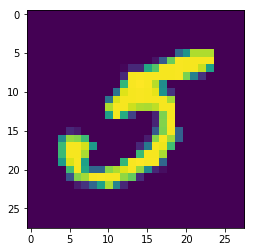

In [7]:
plt.imshow(some_digit_image)

In [8]:
y[36000]

5.0

In [9]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
#X_train,X_test= X_train/255, X_test/255

In [10]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [11]:
#index_train=np.logical_or(y_train==9 , y_train==8)
#index_test= np.logical_or(y_test==8 , y_test==8)
#X_train,X_test,y_train,y_test= X_train[index_train],X_test[index_test],y_train[index_train],y_test[index_test]

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2,solver='svd')
#svc = LinearSVC()
cross_val_score(lda,X_train,y_train,cv=5,scoring='accuracy')
#cross_val_score(svc,X_train,y_train,cv=3,scoring='accuracy')

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([0.86630571, 0.87002166, 0.859     , 0.86629991, 0.86162054])

In [14]:
y_train_predict=cross_val_predict(lda,X_train,y_train,cv=5)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
conf_mx=confusion_matrix(y_train,y_train_predict)
conf_mx

array([[5572,    4,   26,   35,   24,  105,   53,    2,   94,    8],
       [   0, 6456,   40,   22,   11,   40,    7,    9,  145,   12],
       [  61,  212, 4792,  193,  124,   31,  200,   46,  265,   34],
       [  14,   97,  173, 5151,   24,  233,   23,   99,  176,  141],
       [   6,   60,   36,    2, 5212,   51,   30,    3,   52,  390],
       [  62,   60,   26,  267,   54, 4408,  120,   31,  251,  142],
       [  68,   59,   62,    5,   90,  146, 5401,    0,   81,    6],
       [  38,  147,   42,   45,  190,   17,    1, 5185,   29,  571],
       [  32,  328,   54,  201,   77,  296,   34,   12, 4648,  169],
       [  35,   28,   17,   96,  336,   27,    0,  298,   58, 5054]])

In [17]:
row_sum= conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx= conf_mx/row_sum
np.fill_diagonal(norm_conf_mx,0)

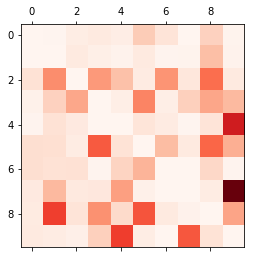

In [18]:
plt.matshow(norm_conf_mx,cmap= plt.cm.Reds)